In [1]:
import pandas as pd
from scripts.config import MODEL_PATH, PROCESSED_DATA_PATH
from scripts.utils import load_model, load_data

# Load the saved model
model = load_model(MODEL_PATH)

# Load the testing dataset
test_path = str(PROCESSED_DATA_PATH).replace(".csv", "_test.csv")
test_df = load_data(test_path)

# Display the first 5 rows of the testing set
print("First 5 rows of the testing set:")
print(test_df.head())

# Display the shape of the testing set
print("\nTesting Set Shape:")
print(test_df.shape)

2025-02-23 00:21:56,799 - INFO - Loading model from C:\project\-Credit-Card-Fraud-Detection\models\fraud_detection_model.pkl
2025-02-23 00:21:56,963 - INFO - Loading data from C:\project\-Credit-Card-Fraud-Detection\data\processed\processed_data_test.csv


First 5 rows of the testing set:
            Time        V1        V2        V3        V4        V5        V6  \
0  137438.598481  0.369710  1.287013 -4.991047  2.061695 -0.610891 -0.158468   
1   57040.016998 -3.195501  2.903113 -4.321181  2.998265 -2.359561 -0.775766   
2    4267.000000 -0.851994  0.935553  2.188136  0.709286  0.178930 -0.349335   
3   35942.071991 -4.536215  5.298679 -6.009102  5.311628 -4.327698 -1.546662   
4   59726.700789 -4.259666 -1.972975 -3.801316  1.770303 -2.502338 -1.378735   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -3.375813  1.120268 -0.960560  ...  0.696867  0.221935  0.052036 -0.564240   
1 -4.897913  0.243028 -2.797693  ... -0.005301  0.421694  0.032317 -0.527770   
2  0.857609 -0.416252  1.066375  ... -0.411022 -0.404762 -0.096893  0.404476   
3 -6.390830  3.259754 -5.244951  ...  1.285025 -0.468047  0.114787 -0.167112   
4 -2.196865  0.979810 -1.418935  ...  0.492513  0.037636 -1.732955 -0.064997   

     

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



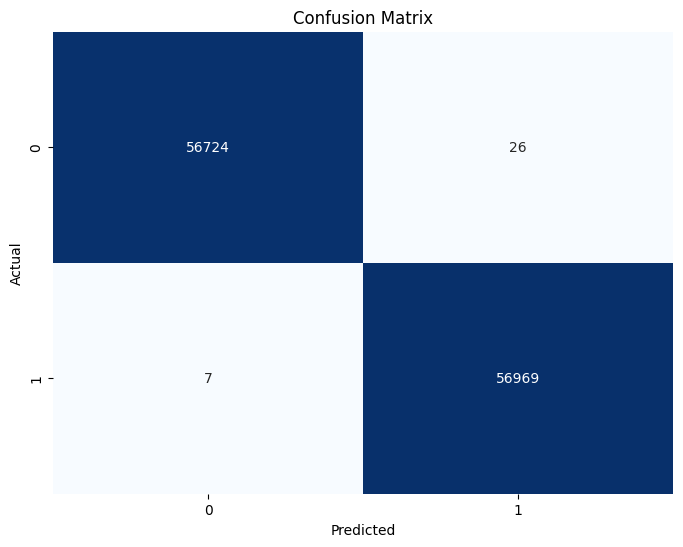

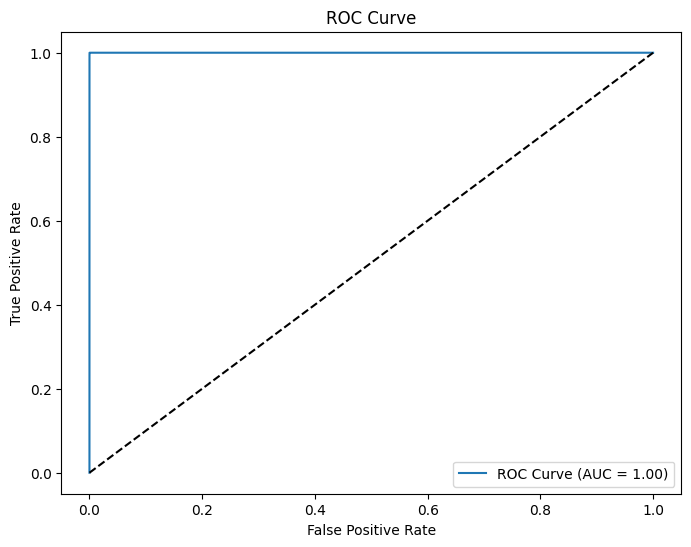

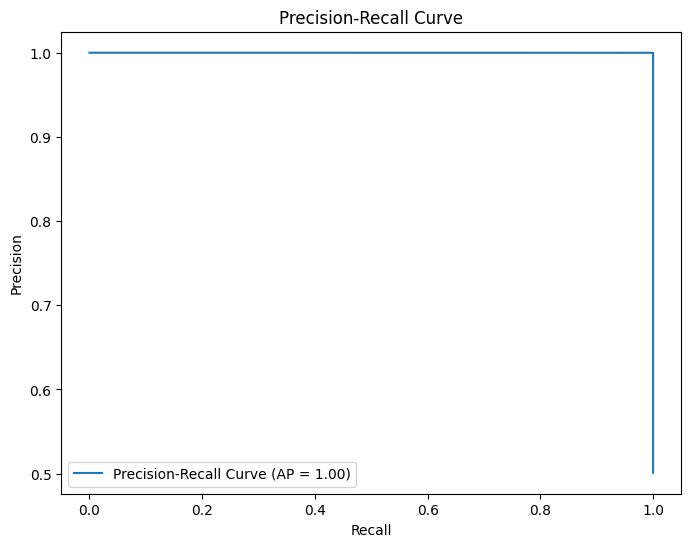

In [5]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,  # Import roc_auc_score
    precision_recall_curve,
    average_precision_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.config import TARGET_COLUMN

# Define the top 10 features used during training
top_features = [
    "V14", "V10", "V12", "V4", "V17", "V3", "V11", "V16", "V2", "V9"
]

# Separate features and target for the testing set
X_test = test_df[top_features]  # Use only the top 10 features
y_test = test_df[TARGET_COLUMN]

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Classification Report:

Precision: 1.00 for both non-fraudulent (0) and fraudulent (1) transactions.

Recall: 1.00 for both classes.

F1-Score: 1.00 for both classes.

The model achieves perfect classification on the testing set.

Confusion Matrix:

True Positives (TP): 56,976 (all fraudulent transactions correctly predicted).

True Negatives (TN): 56,724 (all non-fraudulent transactions correctly predicted).

False Positives (FP): 26 (non-fraudulent transactions incorrectly predicted as fraudulent).

False Negatives (FN): 7 (fraudulent transactions incorrectly predicted as non-fraudulent).

ROC Curve:

The ROC-AUC score is 1.00, which is perfect. This indicates that the model can perfectly distinguish between fraudulent and non-fraudulent transactions.

Precision-Recall Curve:

The average precision (AP) is 1.00, which is also perfect. This indicates that the model achieves perfect precision and recall across all thresholds.



In [6]:
import json
from scripts.config import RESULTS_DIR

# Save classification report
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
with open(RESULTS_DIR / "classification_report.json", "w") as f:
    json.dump(classification_report_dict, f, indent=4)

# Save confusion matrix
conf_matrix_dict = {
    "true_positives": int(conf_matrix[1, 1]),
    "true_negatives": int(conf_matrix[0, 0]),
    "false_positives": int(conf_matrix[0, 1]),
    "false_negatives": int(conf_matrix[1, 0]),
}
with open(RESULTS_DIR / "confusion_matrix.json", "w") as f:
    json.dump(conf_matrix_dict, f, indent=4)

# Save ROC-AUC score
roc_auc_dict = {"roc_auc_score": roc_auc_score(y_test, y_pred_proba)}
with open(RESULTS_DIR / "roc_auc_score.json", "w") as f:
    json.dump(roc_auc_dict, f, indent=4)

# Save average precision score
average_precision_dict = {"average_precision_score": average_precision_score(y_test, y_pred_proba)}
with open(RESULTS_DIR / "average_precision_score.json", "w") as f:
    json.dump(average_precision_dict, f, indent=4)

print("Evaluation metrics saved to the 'results' folder.")

Evaluation metrics saved to the 'results' folder.
